# USA Gymnast with best chances to medal in Uneven Bars are:

- skye blakely

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:

# # Assuming you already have your DataFrame 'df' and the target variable is 'medal'
# y = df['medal']
# X = df.drop(columns=['medal'])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# # Initialize classifiers
# classifiers = {
#     "Random Forest": RandomForestClassifier(),
#     "AdaBoost": AdaBoostClassifier(),
#     "SVM": SVC(),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(),
#     "Naive Bayes": GaussianNB(),
#     "Neural Network": MLPClassifier(),
# }

# results = {}

# # Iterate through each classifier
# for name, clf in classifiers.items():
#     # Create a pipeline with StandardScaler for classifiers that require it
#     if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
#         clf = make_pipeline(StandardScaler(), clf)

#     # Fit the model to the training data
#     clf.fit(X_train, y_train)

#     # Make predictions on the test data
#     y_pred = clf.predict(X_test)

#     # Evaluate the model's performance
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
#     conf_matrix = confusion_matrix(y_test, y_pred)

#     results[name] = {
#         "accuracy": accuracy,
#         "classification_report": report,
#         "confusion_matrix": conf_matrix,
#     }

# # Print the results
# for name, result in results.items():
#     print(f"Classifier: {name}")
#     print(f"Accuracy: {result['accuracy']:.4f}")
#     print(f"Classification Report:\n{result['classification_report']}")
#     print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


In [3]:
df = pd.read_csv('../Combine_Data/bb_encoded.csv')
olymp = pd.read_csv('../Data/cleandata22-23/encoded_w_olympics_bb.csv')
bbnames = pd.read_csv('../Data/cleandata22-23/encoded_w_olympics_bbnames.csv')

In [4]:
clf = make_pipeline(StandardScaler(), SVC())

In [5]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)


<!-- Classifier: AdaBoost
Accuracy: 1.0000


Classifier: SVM
Accuracy: 0.9831


Classifier: Decision Tree
Accuracy: 0.9831

Classifier: K-Nearest Neighbors
Accuracy: 0.9746

Classifier: Random Forest
Accuracy: 0.9746 -->

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        98
           1       1.00      0.50      0.67         2

    accuracy                           0.99       100
   macro avg       0.99      0.75      0.83       100
weighted avg       0.99      0.99      0.99       100



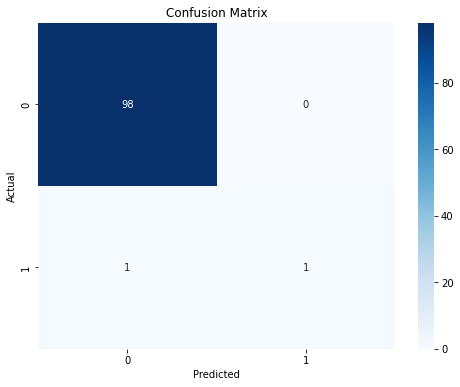

In [6]:
# Create and train the DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
clf=decision_tree_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [7]:
olymp = olymp.drop(columns=['round_aafinal', 'round_teamfinal'])

In [8]:
olymp_pred = decision_tree_model.predict(olymp)


In [9]:
ypreds  = pd.Series(olymp_pred)

In [10]:
olymp['ypred']=ypreds

In [11]:
olymp['ypred'].value_counts()

ypred
0    1305
1       2
Name: count, dtype: int64

In [12]:
filtered_df = olymp[olymp['ypred'] == 1]

In [13]:
filtered_df

,Rank,D Score,E Score,Pen.,Total,year,Name,nation,round_final,round_qual,ypred
89,5.0,6.2,7.10,0.0,13.30,2022,493,77,True,False,1
123,0.0,6.3,7.15,0.0,13.45,2022,493,77,False,True,1


In [14]:
filtered_df["Name"].unique()

array([493])

In [15]:
# List of Name_encoded values you want to filter by
name_encoded_values = [493]

# Create an empty set to store unique names
unique_names = set()

# Iterate through the DataFrame and add unique names to the set
for index, row in bbnames.iterrows():
    if row['Name_encoded'] in name_encoded_values:
        unique_names.add(row['Name'])

# Convert the set of unique names back to a list
unique_names_list = list(unique_names)


In [16]:
unique_names_list

['skye blakely']